In [96]:
#Import the dependencies.
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs =zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

#Import the API key
from config import weather_api_key

In [8]:
# Starting URL for weather map API call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
   #     time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | otorohanga
Processing Record 5 of Set 1 | takoradi
Processing Record 6 of Set 1 | provideniya
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | kaeo
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | pitimbu
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | yichang
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | turukhansk
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | ginir
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Set 1 | kursuml

Processing Record 33 of Set 4 | wamba
Processing Record 34 of Set 4 | meulaboh
Processing Record 35 of Set 4 | brazzaville
Processing Record 36 of Set 4 | gondanglegi
Processing Record 37 of Set 4 | shkotovo-26
City not found. Skipping...
Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | wewak
Processing Record 40 of Set 4 | marsa matruh
Processing Record 41 of Set 4 | terenos
Processing Record 42 of Set 4 | terrace
Processing Record 43 of Set 4 | saint-denis
Processing Record 44 of Set 4 | batagay-alyta
Processing Record 45 of Set 4 | severo-kurilsk
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | vagur
Processing Record 1 of Set 5 | tragana
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5

Processing Record 27 of Set 8 | calama
Processing Record 28 of Set 8 | hambantota
Processing Record 29 of Set 8 | valparaiso
Processing Record 30 of Set 8 | san-pedro
Processing Record 31 of Set 8 | anadyr
Processing Record 32 of Set 8 | porto torres
Processing Record 33 of Set 8 | manchester
Processing Record 34 of Set 8 | carahue
Processing Record 35 of Set 8 | west bay
Processing Record 36 of Set 8 | kingaroy
Processing Record 37 of Set 8 | edgewater
Processing Record 38 of Set 8 | santa maria
Processing Record 39 of Set 8 | furth im wald
Processing Record 40 of Set 8 | harlingen
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | nevers
Processing Record 43 of Set 8 | qasigiannguit
Processing Record 44 of Set 8 | nola
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | burica
City not found. Skipping...
Processing Record 47 of Set 8 | santo antonio do ica
Processing Record 48 of Set 8 | maniitsoq
Processing Record 49 of Set 8 | port-gentil
Proce

Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | talaya
Processing Record 14 of Set 12 | phuthaditjhaba
Processing Record 15 of Set 12 | byron bay
Processing Record 16 of Set 12 | lewistown
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | tombouctou
Processing Record 19 of Set 12 | huarmey
Processing Record 20 of Set 12 | ossora
Processing Record 21 of Set 12 | hualmay
Processing Record 22 of Set 12 | hella
Processing Record 23 of Set 12 | aquiraz
Processing Record 24 of Set 12 | afmadu
City not found. Skipping...
Processing Record 25 of Set 12 | toliary
City not found. Skipping...
Processing Record 26 of Set 12 | sam roi yot
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | jiddah
City not found. Skipping...
Processing Record 29 of Set 12 | santa cruz cabralia
Processing Record 30 of Set 12 | aklavik
Processing Record 31 of Set 12 | los llanos de aridane
Processing Record 32 of Set 12 | udachnyy
Processing Record 3

In [10]:
len(city_data)

547

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,53.94,84,100,16.11,US,2022-03-13 03:23:42
1,Puerto Ayora,-0.7393,-90.3518,75.54,100,16,3.00,EC,2022-03-13 03:20:44
2,Avarua,-21.2078,-159.7750,84.25,74,20,4.61,CK,2022-03-13 03:23:43
3,Otorohanga,-38.1833,175.2000,76.17,43,100,4.14,NZ,2022-03-13 03:23:43
4,Takoradi,4.8845,-1.7554,79.47,85,100,5.23,GH,2022-03-13 03:23:44
5,Provideniya,64.3833,-173.3000,18.07,62,0,11.72,RU,2022-03-13 03:23:44
6,Hobart,-42.8794,147.3294,79.23,45,20,13.80,AU,2022-03-13 03:21:57
7,Kaeo,-35.1000,173.7833,76.32,71,68,11.74,NZ,2022-03-13 03:23:44
8,Ribeira Grande,38.5167,-28.7000,58.03,61,18,13.96,PT,2022-03-13 03:23:45
9,Upernavik,72.7868,-56.1549,-17.34,100,100,6.62,GL,2022-03-13 03:23:45


In [12]:
#reorder the columns


new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2022-03-13 03:23:42,40.5982,-124.1573,53.94,84,100,16.11
1,Puerto Ayora,EC,2022-03-13 03:20:44,-0.7393,-90.3518,75.54,100,16,3.00
2,Avarua,CK,2022-03-13 03:23:43,-21.2078,-159.7750,84.25,74,20,4.61
3,Otorohanga,NZ,2022-03-13 03:23:43,-38.1833,175.2000,76.17,43,100,4.14
4,Takoradi,GH,2022-03-13 03:23:44,4.8845,-1.7554,79.47,85,100,5.23
5,Provideniya,RU,2022-03-13 03:23:44,64.3833,-173.3000,18.07,62,0,11.72
6,Hobart,AU,2022-03-13 03:21:57,-42.8794,147.3294,79.23,45,20,13.80
7,Kaeo,NZ,2022-03-13 03:23:44,-35.1000,173.7833,76.32,71,68,11.74
8,Ribeira Grande,PT,2022-03-13 03:23:45,38.5167,-28.7000,58.03,61,18,13.96
9,Upernavik,GL,2022-03-13 03:23:45,72.7868,-56.1549,-17.34,100,100,6.62


In [61]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


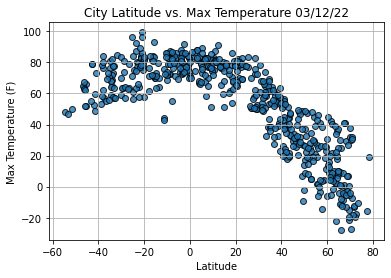

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

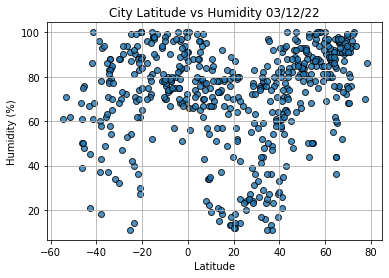

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show

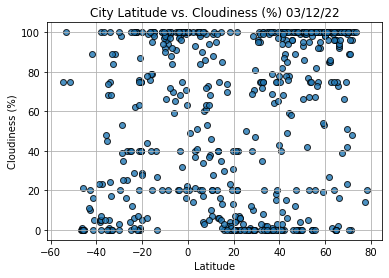

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

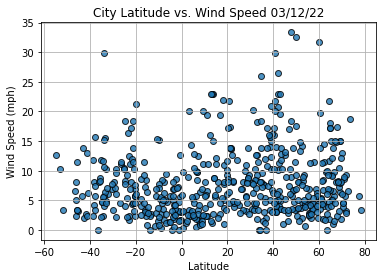

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [36]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [37]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

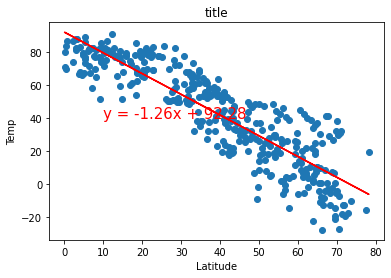

In [44]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [55]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
 # Import linregress
 from scipy.stats import linregress

 # Create a function to create perform linear regression on the weather data
 # and plot a regression line and the equation with the data.

 def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
 # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope +intercept
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for teh line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title('title')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
index13 = city_data_df.loc[13]
index13

City                      Te Anau
Country                        NZ
Date          2022-03-13 03:23:47
Lat                      -45.4167
Lng                      167.7167
Max Temp                    66.27
Humidity                       48
Cloudiness                      0
Wind Speed                   3.13
Name: 13, dtype: object

In [70]:
city_data_df["Lat"] >=0

0       True
1      False
2      False
3      False
4       True
       ...  
542    False
543     True
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [58]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2022-03-13 03:23:42,40.5982,-124.1573,53.94,84,100,16.11
4,Takoradi,GH,2022-03-13 03:23:44,4.8845,-1.7554,79.47,85,100,5.23
5,Provideniya,RU,2022-03-13 03:23:44,64.3833,-173.3000,18.07,62,0,11.72
8,Ribeira Grande,PT,2022-03-13 03:23:45,38.5167,-28.7000,58.03,61,18,13.96
9,Upernavik,GL,2022-03-13 03:23:45,72.7868,-56.1549,-17.34,100,100,6.62


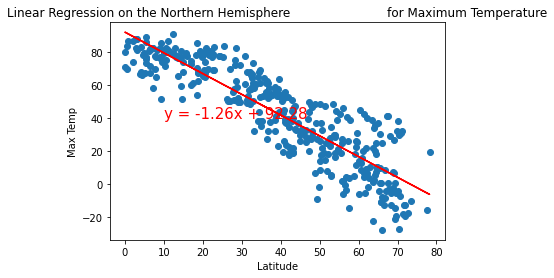

In [73]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

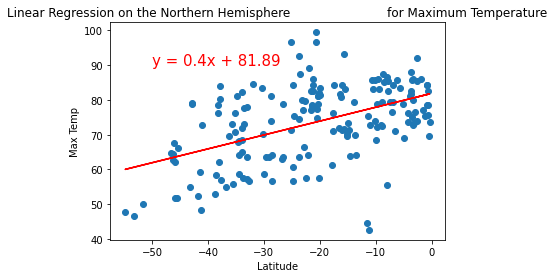

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

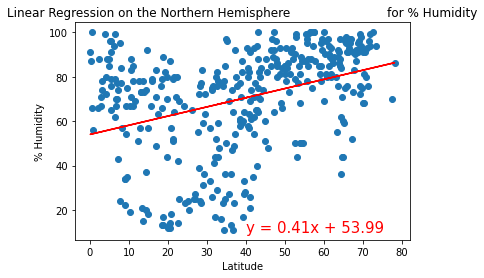

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

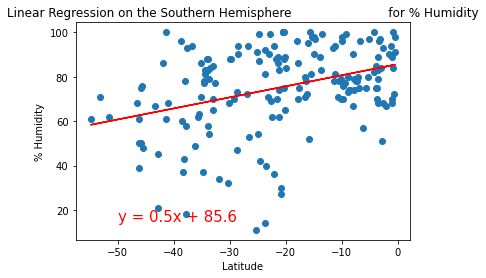

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

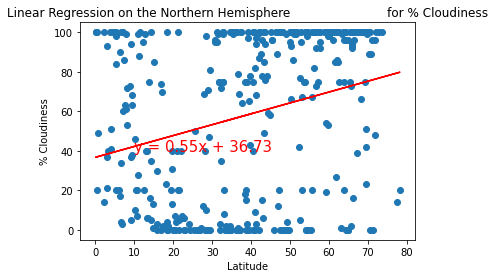

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

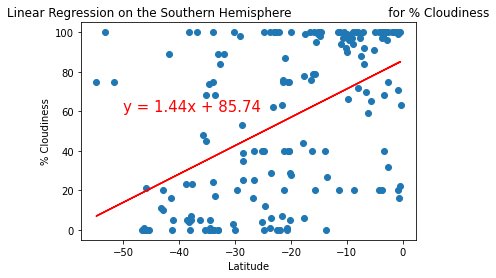

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

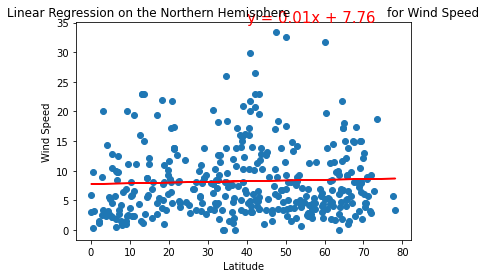

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

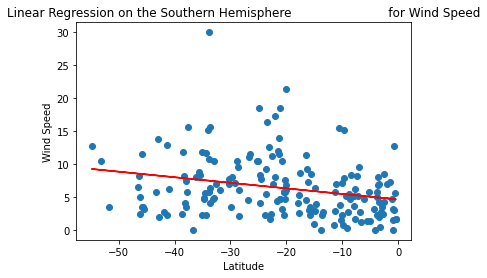

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [2]:
#import the dependencies
import pandas as pd
import gmaps
import requests

#Import the API key
from config import g_key

In [3]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Fortuna,US,2022-03-13 03:23:42,40.5982,-124.1573,53.94,84,100,16.11
1,1,Puerto Ayora,EC,2022-03-13 03:20:44,-0.7393,-90.3518,75.54,100,16,3.00
2,2,Avarua,CK,2022-03-13 03:23:43,-21.2078,-159.7750,84.25,74,20,4.61
3,3,Otorohanga,NZ,2022-03-13 03:23:43,-38.1833,175.2000,76.17,43,100,4.14
4,4,Takoradi,GH,2022-03-13 03:23:44,4.8845,-1.7554,79.47,85,100,5.23


In [4]:
#Get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [5]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)


In [7]:
# 1. Assign the locations to an array of latitude and longitude pairs.
#locations = [latitude, longitude]
locations = city_data_df[["Lat", "Lng"]]
#Humidity = city_data_df['Humidity'].astype(int)
#max_temp = city_data_df['Max Temp'].astype(int)

# 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length

#max_temp = city_data_df["Max Temp"]


# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]

temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
#                            dissipating=False, max_intensity=10,
 #                           point_radius =1)


# 5. Add the heatmap layer.
fig.add_layer(heat_layer)

# 6. Call the figure to plot the data.

fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)